## Imports

In [103]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display = 'diagram')

from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("data/All_creatures_clean.csv")

In [3]:
df['alignment'].unique()

array(['LE', 'CE', 'NG', 'NE', 'LN', 'N', 'CN', 'CG', 'LG'], dtype=object)

In [ ]:
ord_cat_selector = ['alignment']

In [ ]:
cat_subset = df[ord_cat_selector]

In [ ]:
align_list = ['LG', 'NG', 'LN', 'CG', 'N', 'LE' ,'CN', 'NE', 'CE']

In [ ]:
o_enc = OrdinalEncoder(categories = [align_list])
o_enc.fit(cat_subset)

In [ ]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset["align_full"] = X_subset['alignment'].rename("align_full", inplace = True)

In [ ]:
X_subset = X_subset.drop(columns = ['alignment'])

In [ ]:
df = pd.concat([df, X_subset], axis=1)

In [ ]:
df.info()

In [4]:
conditions = [[df['alignment'].isin(["LG", "NG", "CG", "LN","N",])], df['alignment'].isin(["LE","NE","CE", "NE"])]
values = [0,1]
array = np.select(conditions, values)

In [5]:
array[0]

array([1, 1, 0, ..., 0, 0, 1])

In [6]:
series = pd.Series(array[0])

In [7]:
df['target'] = series

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2002 non-null   object 
 1   name            2002 non-null   object 
 2   alignment       2002 non-null   object 
 3   hp              2002 non-null   int64  
 4   ac              2002 non-null   int64  
 5   level           2002 non-null   int64  
 6   strength        2002 non-null   int64  
 7   dexterity       2002 non-null   int64  
 8   constitution    2002 non-null   int64  
 9   intelligence    2002 non-null   int64  
 10  wisdom          2002 non-null   int64  
 11  charisma        2002 non-null   int64  
 12  will_save       2002 non-null   int64  
 13  reflex_save     2002 non-null   int64  
 14  fortitude_save  2002 non-null   int64  
 15  perception      2002 non-null   int64  
 16  npc             2002 non-null   bool   
 17  size            2002 non-null   o

## Encoding

In [9]:
df['vision'].unique()

array(['standard', 'Darkvision', 'Low-light vision', 'Greater darkvision'],
      dtype=object)

In [10]:
df['rarity'].unique()

array(['unique', 'uncommon', 'common', 'rare'], dtype=object)

In [11]:
df['size'].unique()

array(["['Small']", "['Medium']", "['Large']", "['Huge']",
       "['Gargantuan']", "['Tiny']"], dtype=object)

In [12]:
ord_cat_selector = ["rarity", 'vision', 'size']

In [13]:
cat_subset = df[ord_cat_selector]

In [14]:
rarity_list = ['common', 'uncommon', 'rare', 'unique']
vision_list = ['standard', 'Low-light vision', 'Darkvision', 'Greater darkvision']
size_list = ["['Tiny']", "['Small']", "['Medium']", "['Large']", "['Huge']", "['Gargantuan']"]

In [15]:
o_enc = OrdinalEncoder(categories = [rarity_list, vision_list, size_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['common', 'uncommon', 'rare', 'unique'],
                           ['standard', 'Low-light vision', 'Darkvision',
                            'Greater darkvision'],
                           ["['Tiny']", "['Small']", "['Medium']", "['Large']",
                            "['Huge']", "['Gargantuan']"]])

In [16]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,rarity,vision,size
0,3.0,0.0,1.0
1,1.0,2.0,2.0
2,0.0,2.0,2.0
3,0.0,2.0,2.0
4,0.0,0.0,2.0
...,...,...,...
1997,0.0,2.0,1.0
1998,3.0,0.0,2.0
1999,2.0,3.0,1.0
2000,0.0,2.0,2.0


In [17]:
df = df.drop(columns = ['rarity', 'vision', 'size'])

In [18]:
df = pd.concat([df, X_subset], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2002 non-null   object 
 1   name            2002 non-null   object 
 2   alignment       2002 non-null   object 
 3   hp              2002 non-null   int64  
 4   ac              2002 non-null   int64  
 5   level           2002 non-null   int64  
 6   strength        2002 non-null   int64  
 7   dexterity       2002 non-null   int64  
 8   constitution    2002 non-null   int64  
 9   intelligence    2002 non-null   int64  
 10  wisdom          2002 non-null   int64  
 11  charisma        2002 non-null   int64  
 12  will_save       2002 non-null   int64  
 13  reflex_save     2002 non-null   int64  
 14  fortitude_save  2002 non-null   int64  
 15  perception      2002 non-null   int64  
 16  npc             2002 non-null   bool   
 17  speed.max       2002 non-null   f

# EDA

In [20]:
not_in = ['_id','name','alignment', 'target'] 

In [21]:
X = df.drop(columns = not_in)
y = df['target']

In [22]:
df.columns

Index(['_id', 'name', 'alignment', 'hp', 'ac', 'level', 'strength',
       'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma',
       'will_save', 'reflex_save', 'fortitude_save', 'perception', 'npc',
       'speed.max', 'immunity', 'total_res', 'total_weak', 'stealth',
       'deception', 'intimidation', 'thievery', 'occultism', 'animal',
       'humanoid', 'mindless', 'undead', 'target', 'rarity', 'vision', 'size'],
      dtype='object')

In [23]:
included = ['hp', 'ac', 'level', 'strength',
       'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma',
       'will_save', 'reflex_save', 'fortitude_save', 'perception', 'npc',
       'speed.max', 'immunity', 'total_res', 'total_weak', 'stealth',
       'deception', 'intimidation', 'thievery', 'occultism', 'animal',
       'humanoid', 'mindless', 'undead', 'rarity', 'vision', 'size']

In [ ]:
sns.pairplot(data=df,kind = "hist" ,
                  x_vars=['align_full'],
                  y_vars=included, 
            height = 5)

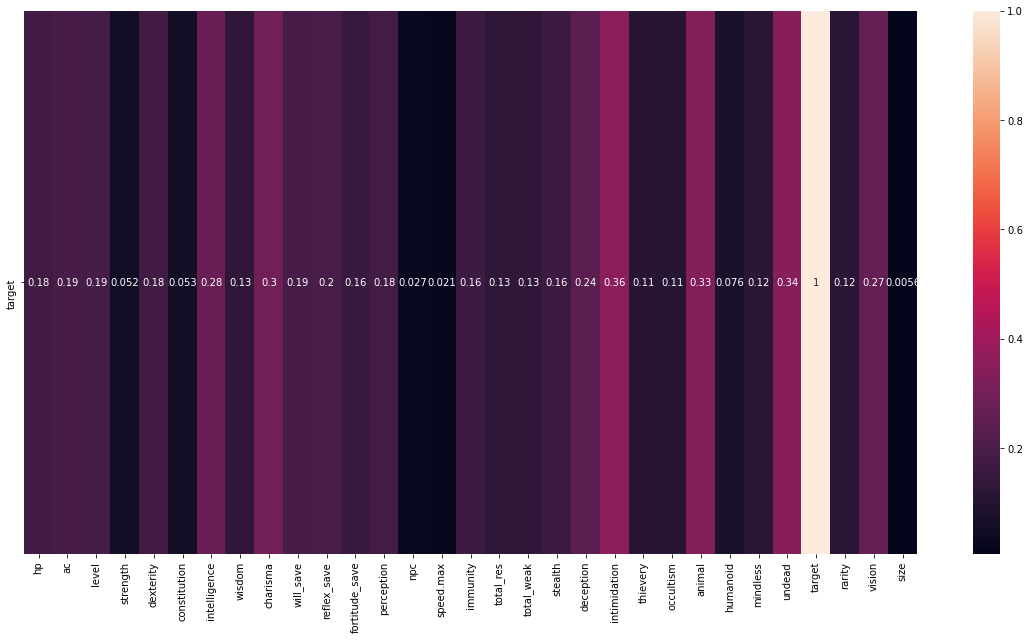

In [248]:
corr_matrix = df.drop(columns = ['_id','name','alignment']).corr().abs().loc[['target'],:]
plt.subplots(figsize=(20, 10))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True )

plt.show()

In [24]:
lowest_corr = ["strength", "npc", "speed.max", "size"]

In [25]:
df_res_weak = pd.read_csv("Data/res_weak.csv")
df_skill = pd.read_csv('Data/df_skill.csv')
df_trait = pd.read_csv('Data/df_trait.csv')

In [26]:
df_short = df.drop(columns = ['stealth',
       'deception', 'intimidation', 'thievery', 'occultism', 'animal',
       'humanoid', 'mindless', 'undead'])

In [27]:
df_too_big = pd.concat([df_short, df_res_weak, df_skill, df_trait], axis=1)

In [28]:
%pprint

Pretty printing has been turned OFF


In [247]:
len(list(df_too_big.columns))

436

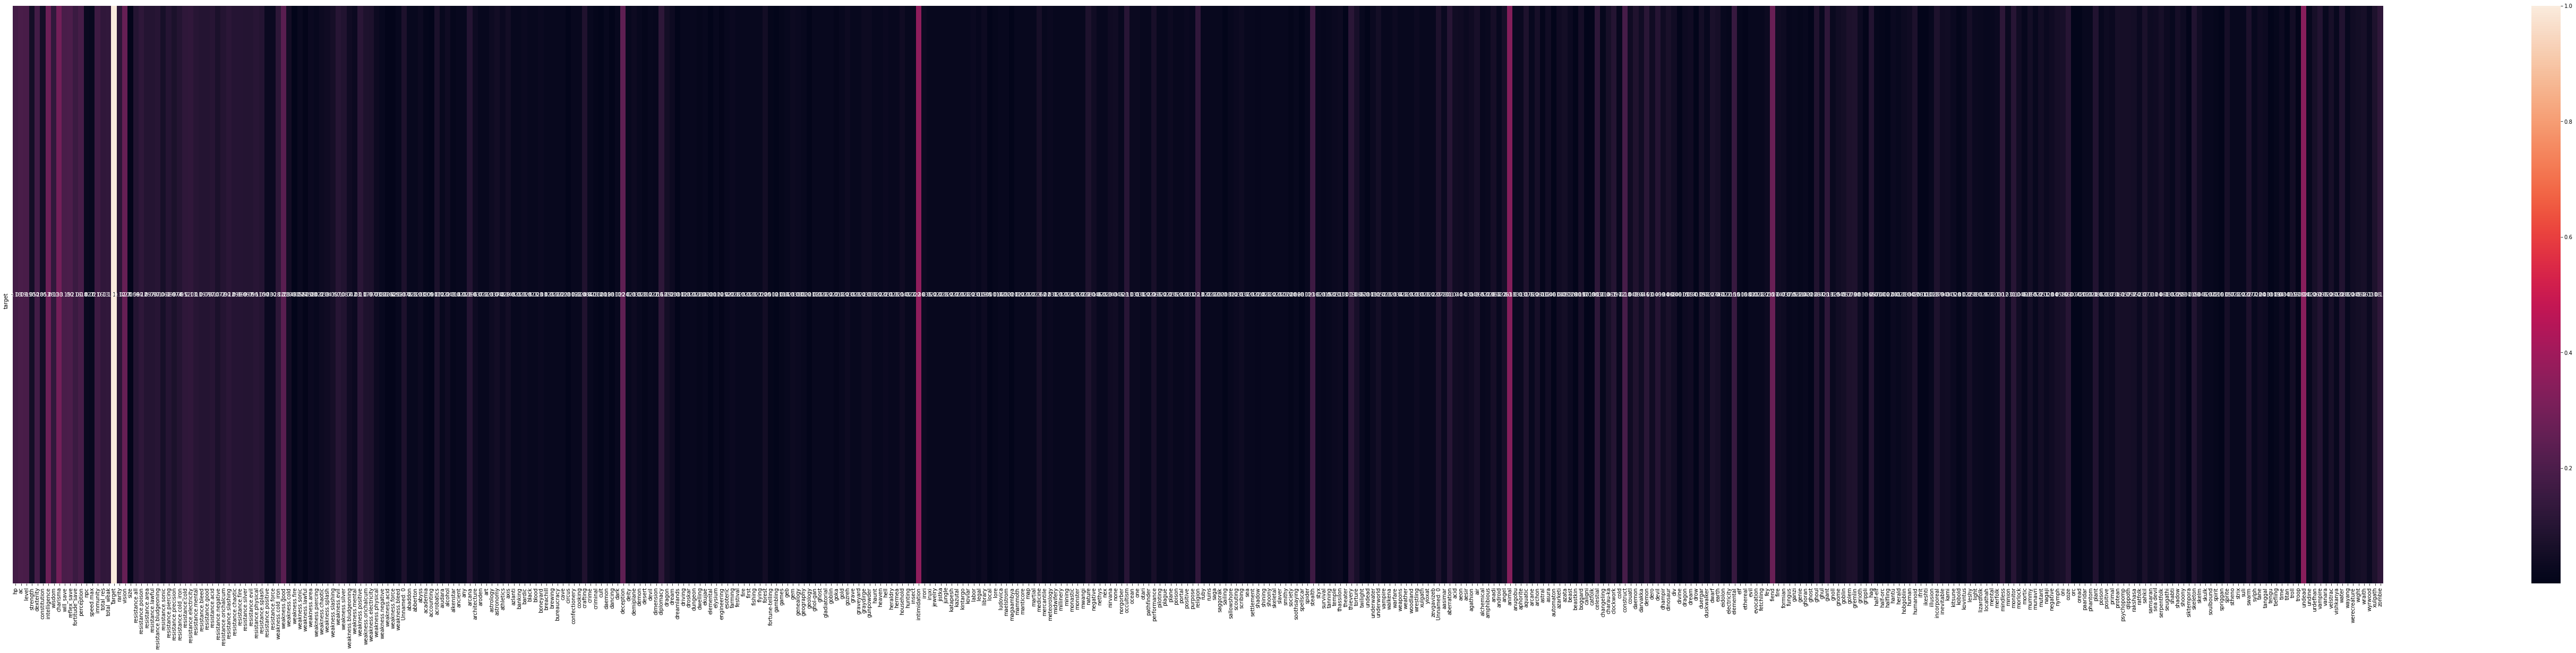

In [246]:
corr_matrix = df_too_big.drop(columns = ['_id','name','alignment']).corr().abs().loc[['target'],:]
plt.subplots(figsize=(100, 20))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True,)

plt.show()

In [ ]:
full_corr = df_too_big.drop(columns = ['_id','name','alignment']).corr().abs().loc[['target'],:]

In [ ]:
full_corr.iloc[0,2]

# Modeling

## Base Model

In [104]:
X = df.drop(columns = not_in)
y = df['target']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [112]:
tree_clf = DecisionTreeClassifier(random_state = 1)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
plot_tree(tree_clf;

In [114]:
tree_clf.score(X_test, y_test)

0.7354409317803661

In [115]:
y_pred = tree_clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       309
           1       0.71      0.77      0.74       292

    accuracy                           0.74       601
   macro avg       0.74      0.74      0.74       601
weighted avg       0.74      0.74      0.74       601



## Logistic Regression

In [ ]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test) 

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## Decision Tree

In [ ]:
X = df.drop(columns = ['_id','name','alignment', 'target', ''])
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

In [ ]:
tree_clf.score(X_test, y_test)

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Pipe

### KNN

In [ ]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.25)

In [ ]:
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

model_pipe = Pipeline(steps)

In [ ]:
pipe_grid = {'imputer__strategy': ["mean", "median"],
             'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18],
             'knn__p': [ 1,2, 3, 4, 5]}

# note: default scoring is aaccuracy
gs_pipe = GridSearchCV(estimator=model_pipe, 
                       param_grid=pipe_grid,
                        ) #scoring="f1"


In [ ]:
gs_pipe.fit(X_train, y_train);

In [ ]:
gs_pipe.best_params_

In [ ]:
gs_pipe.best_score_

In [ ]:
best_model = gs_pipe.best_estimator_
best_model

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
plot_confusion_matrix(best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

### Logreg

In [ ]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.3)

### Random Forest???

In [ ]:
X = df_too_big.drop(columns = ['_id','name','alignment', 'target'])
y = df_too_big['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.3)

In [ ]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                      ('model',
                       RandomForestClassifier(n_estimators = 100))])

In [ ]:
rf_params = {'model__n_estimators': [50, 55, 60, 65, 70] ,
             'model__min_samples_leaf': [1,2,3,5]}
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

In [ ]:
rf_cv.best_params_

In [ ]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

In [ ]:
best_rf_model.fit(X_train, y_train)

In [ ]:
y_rfcv_pred = best_rf_model.predict(X_test)
print(classification_report(y_test,y_rfcv_pred))

### XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [ ]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']

In [ ]:
model = XGBClassifier()

pipeline = Pipeline([
    ('model', model)
])

param_grid = {
    'model__max_depth': [3, 4, 5, 6],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
best_model = grid.best_estimator_
best_model

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

### ?????

In [ ]:
df_too_big = df_too_big.loc[:,~df_too_big.columns.duplicated()]

In [ ]:
X = df_too_big.drop(columns = ['_id','name','alignment', 'target', 'Unnamed: 0'])
y = df_too_big['target']


In [ ]:
len(list(X.columns))

In [ ]:
res = [*set(X)]

In [ ]:
len(res)

In [ ]:
X = df_too_big[res]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.2)

In [ ]:
params = {'max_depth': [3,4, 5], 'learning_rate': [.1, .3, .5],
          'gamma': [0,5,10], 'colsample_bynode': [.5, .75, 1], 'n_estimators': [50,100, 150] }

In [ ]:
cv = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'),
                  param_grid = params, cv = 5)

In [ ]:
cv.fit(X_train, y_train);

In [ ]:
cv.best_score_

In [ ]:
best_regressor = cv.best_estimator_
best_regressor

In [ ]:
best_regressor.fit(X_train, y_train)
y_pred_train = best_regressor.predict(
    X_train)
y_pred_test = best_regressor.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
feat_imp = pd.Series(best_regressor.feature_importances_,
             index = X.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
feat_imp.plot(kind = 'barh', ax = ax)
ax.set_xlabel('Feature Importance')
ax.set_title('XGB Regressor: Feature Importances')
plt.show()

In [ ]:
best_feat = ['intimidation', 'intelligence', 'diplomacy', 'animal', 'resistance.electricity', 'vision', 'deception', 
             'resistance.slashing', 'nature', 'stealth', 'water', 'construct', 'resistance.physical', 'monitor', 
             'nymph', 'beast', 'thievery', 'charisma', 'zombie', 'resistance.piercing']

In [ ]:
feat_imp.loc[(feat_imp != 0)].index

In [30]:
rel_feat = ['intimidation', 'intelligence', 'diplomacy', 'animal', 
            'resistance.electricity', 'vision', 'deception', 
            'resistance.slashing', 'nature', 'stealth', 'water',
            'construct', 'resistance.physical', 'monitor', 'nymph',
       'beast', 'thievery', 'charisma', 'zombie', 'resistance.piercing',
       'earth', 'weakness.cold_iron', 'aberration', 'giant',
       'speed.max', 'performance',
       'religion', 'survival', 'arcana', 'medicine', 'npc', 'reflex_save',
       'spirit', 'resistance.sonic', 'athletics', 'fey', 'underworld',
       'constitution', 'resistance.bludgeoning', 'weakness.cold', 'society',
       'strength', 'air', 'wisdom', 'crafting', 'weakness.silver',
       'amphibious', 'perception', 'human', 'level', 'dexterity', 'plant',
       'fortitude_save', 'hp', 'rarity', 'dwarf', 'weakness.fire', 'ac',
       'ghoul', 'elf', 'weakness.area', 'total_weak', 'immunity', 'acrobatics',
       'total_res', 'leshy', 'will_save', 'resistance.fire', 'mutant',
       'gremlin', 'serpentfolk', 'size', 'resistance.poison', 'forest', 'hag',
       'occultism', 'golem']

## Final Model

### Random Forest

In [236]:
X = df_too_big[rel_feat]
y = df_too_big['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.2, random_state = 1)

In [237]:
rf_pipe = Pipeline([('scaler', StandardScaler()),
                      ('model',
                       RandomForestClassifier(n_estimators = 100, random_state = 1))])

In [238]:
rf_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_impurity_split', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

In [245]:
rf_params = {'model__n_estimators': [50, 55, 60, 65, 70] ,
             'model__min_samples_leaf': [1,2,3,5],
             'model__max_depth': [4,5,6,7,8,9]}
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf_cv.best_params_

In [ ]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

In [ ]:
best_rf_model.fit(X_train, y_train)

In [ ]:
y_rfcv_pred = best_rf_model.predict(X_test)
print(classification_report(y_test,y_rfcv_pred))

In [ ]:
f, ax = plt.subplots(figsize=(30, 30))
plot_tree(best_rf_model[1].estimators_[1], ax = ax);

### XGBClassifier

In [263]:
len(rel_feat)

77

In [214]:
X = df_too_big[rel_feat]
y = df_too_big['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y ,test_size = 0.2, random_state = 1)

In [215]:
params = {'max_depth': [3,4,5, 6], 'learning_rate': [.1, .3, .5, 7],
          'gamma': [0,3,5,8,10], 'colsample_bynode': [.25,.5, .75, 1], 'n_estimators': [50, 100, 150, 200, 250, 300] }

In [264]:
cv = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic', random_state = 1),
                  param_grid = params, cv = 5, )

In [265]:
cv.fit(X_train, y_train);

KeyboardInterrupt: 

In [ ]:
cv.best_score_

In [ ]:
best_regressor = cv.best_estimator_
best_regressor

In [ ]:
best_regressor.fit(X_train, y_train)
y_pred_train = best_regressor.predict(
    X_train)
y_pred_test = best_regressor.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
plot_confusion_matrix(best_regressor, X_test, y_test)

In [ ]:
feat_imp = pd.Series(best_regressor.feature_importances_,
             index = X.columns).sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(10, 10))
feat_imp.plot(kind = 'barh', ax = ax)
ax.set_xlabel('Feature Importance')
ax.set_title('XGB Regressor: Feature Importances')
plt.show()

In [ ]:
feat_imp.iloc[list(range(0,20))]

feat_imp = pd.Series(best_regressor.feature_importances_,
             index = X.columns).sort_values(ascending = False).iloc[list(range(0,20))]
fig, ax = plt.subplots(figsize=(10, 10))
feat_imp.plot(kind = 'barh', ax = ax)
ax.set_xlabel('Feature Importance')
ax.set_title('XGB Regressor: Feature Importances')
plt.show()

In [ ]:
from xgboost import plot_tree as plot_tree_x
f, ax = plt.subplots(figsize=(30, 70))
plot_tree_x(best_regressor, ax=ax);

In [266]:
df_too_big.to_csv("Data/df_too_big.csv")